In [6]:
# ASK CHATGPT TO EXPLAIN THIS CODE
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#img_array = cv2.imread("Training/0/Training_64633357.jpg")  # this reads the image
#img_array.shape     # this tells you the size of the image
#plt.imshow(img_array)   # this shows the image


In [8]:
data_directory = "Training/"    # this is going to be our training dataset

classes = ["0", "1", "2", "3", "4", "5", "6"]   # this is the list of classes -> this has to be the exact name of the training folders

In [9]:
# ASK CHATGPT TO EXPLAIN THIS CODE
# this will read the entire training directory that we
# have and it should show just the first picture in each directory
'''for category in classes:
    path = os.path.join(data_directory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break'''


# this changes the size of the original images(48x48) to 
# ImageNet(a popular and new database of pictures) size which is (224x224)
'''img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()
'''

#new_array.shape = (224, 224, 3)

'img_size = 224\nnew_array = cv2.resize(img_array, (img_size, img_size))\nplt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))\nplt.show()\n'

In [10]:
# this is going to read all the images and we are going to resize them 
# into imageNet size and put them in an array called training_data

training_data = []
img_size = 224

def create_training_data():
    for category in classes:
        path = os.path.join(data_directory, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [11]:
create_training_data()

In [12]:
#print(len(training_data)) = 12,000 something

In [13]:
# the reason why we're randomizing our data is because our
# deep learning model should not learn the sequence
import random

random.shuffle(training_data)

In [14]:
X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)  # converting the data into 4 dimensions

In [15]:
#X.shape # now we changed it into 4 dimensions where we have (images, size, size, 3 color channel rgb)

In [16]:
# we normalize the data

X = X/255.0

# Dividing the pixel values by 255 normalizes the data to a range between 0 and 1,
# which is useful for several reasons. 
# For example, it helps the model to converge faster during training, 
# and it also ensures that the input data is on the same scale, 
# which can improve the accuracy of the model. Additionally, 
# it helps to avoid numerical overflow or underflow issues that 
# can occur when working with large or small values.

In [17]:
#Y[0]    # randomized label based on the class numbers. Y currently is a list

#Y = np.array(Y)
#Y.shape

### We will now make the deep learning model for training our data - This is a type of learning called Transfer Learning

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [19]:
model = tf.keras.applications.MobileNetV2() # This is a pre-trained model

In [20]:
#model.summary() # this allows us to check the model (MobileNetV2)

### From this point onwards, we will be fine tuning the layers of the 
### pre trained model to make sure it works BETTER with our data set

In [21]:
based_input = model.layers[0].input
based_output = model.layers[-2].output

In [22]:
based_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [23]:
final_output = layers.Dense(128)(based_output) # adding a new layer, after the output of the global pooling layer
final_output = layers.Activation('relu')(final_output) # activation layer
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)  # classification layer
# we have now succefully cut down the classes in our pre-training model from 1000 to 7

In [24]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [25]:
new_model = keras.Model(inputs = based_input, outputs = final_output)

In [26]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [27]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics= ["accuracy"])

In [59]:
new_model.fit(X, Y, epochs=25) # training the model. Higher the epoch(cycles of training) higher the accuracy

Epoch 1/15
377/377 [==============================] - 541s 1s/step - loss: 0.8671 - accuracy: 0.6768
Epoch 2/15
377/377 [==============================] - 526s 1s/step - loss: 0.8042 - accuracy: 0.7073
Epoch 3/15
377/377 [==============================] - 514s 1s/step - loss: 0.7326 - accuracy: 0.7342
Epoch 4/15
377/377 [==============================] - 508s 1s/step - loss: 0.6828 - accuracy: 0.7534
Epoch 5/15
377/377 [==============================] - 507s 1s/step - loss: 0.6172 - accuracy: 0.7790
Epoch 6/15
377/377 [==============================] - 506s 1s/step - loss: 0.5633 - accuracy: 0.8009
Epoch 7/15
377/377 [==============================] - 507s 1s/step - loss: 0.4902 - accuracy: 0.8229
Epoch 8/15
377/377 [==============================] - 505s 1s/step - loss: 0.4668 - accuracy: 0.8354
Epoch 9/15
377/377 [==============================] - 506s 1s/step - loss: 0.4072 - accuracy: 0.8552
Epoch 10/15
377/377 [==============================] - 503s 1s/step - loss: 0.3536 - accura

In [74]:
new_model.save('my_model_epoch15_92p71.h5') # save the ungodly 3.4 hours of model training we just did into a file

In [37]:
new_model = tf.keras.models.load_model('my_model_epoch5_66p24.h5') # load the newly trained model

In [38]:
frame = cv2.imread("UziSelfie.jpg") # loading sample image to check model

In [39]:
frame.shape

(1072, 1912, 3)

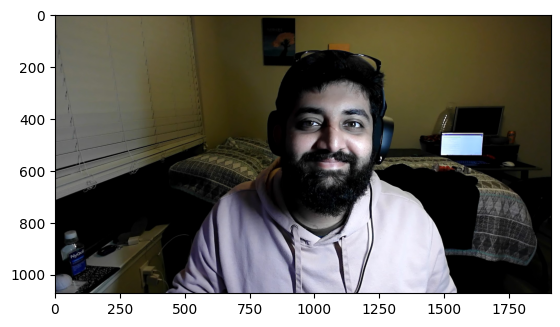

In [40]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [41]:
import cv2 as cv
faceCascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [42]:
gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [43]:
# This code is used to detect faces in an image or a
# video frame using OpenCV's face detection algorithm,
# specifically the detectMultiScale method.
face = faceCascade.detectMultiScale(gray_image, 1.1, 4)
for x,y,w,h in face:
    roi_gray =  gray_image[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    faces = faceCascade.detectMultiScale(roi_gray)
    if len(faces) == 0:
        print("Face not detected")
    else:
        for (ex, ey, ew, eh) in faces:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

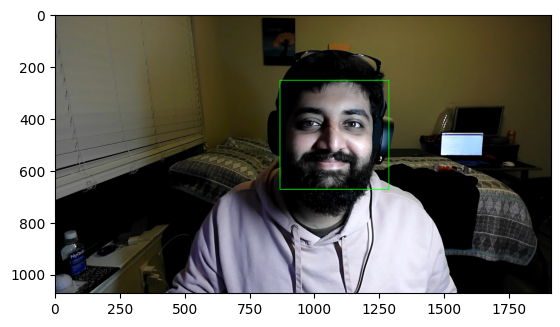

In [44]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

### Now lets try to implement a live video of emotion capture.

In [45]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

cap = cv2.VideoCapture(1)
# check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()     # allows you to read the video frame by frame

    faceCascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face = faceCascade.detectMultiScale(gray_image, 1.1, 4)
    for x,y,w,h in face:
        roi_gray =  gray_image[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        faces = faceCascade.detectMultiScale(roi_gray)
        if len(faces) == 0:
            print("Face not detected")
        else:
            for (ex, ey, ew, eh) in faces:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew]     # cropping the face

    final_image = cv2.resize(face_roi, (224, 224))
    final_image = np.expand_dims(final_image, axis=0)   # need fourth dimension
    final_image=final_image/255.0   # normalizing the image

    font = cv2.FONT_HERSHEY_SIMPLEX

    Predictions = new_model.predict(final_image)

    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

    if (np.argmax(Predictions) == 0):
        status = "Angry"

        x1,y1,w1,h1 = 0,0,175,75

        cv2.rectangle(frame, (x1,x1), (x1 + w1, y1 + h1), (0,0,0), -1)

        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,225), 2)

        cv2.putText(frame, status, (100, 150), font, 3,(0,0,225), 2,cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,225))

    elif (np.argmax(Predictions) == 1):
        status = "Disgust"

        x1,y1,w1,h1 = 0,0,175,75

        cv2.rectangle(frame, (x1,x1), (x1 + w1, y1 + h1), (0,0,0), -1)

        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,225), 2)

        cv2.putText(frame, status, (100, 150), font, 3,(0,0,225), 2,cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,225))

    elif (np.argmax(Predictions) == 2):
        status = "Fear"

        x1,y1,w1,h1 = 0,0,175,75

        cv2.rectangle(frame, (x1,x1), (x1 + w1, y1 + h1), (0,0,0), -1)

        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,225), 2)

        cv2.putText(frame, status, (100, 150), font, 3,(0,0,225), 2,cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,225))

    elif (np.argmax(Predictions) == 3):
        status = "Joy"

        x1,y1,w1,h1 = 0,0,175,75

        cv2.rectangle(frame, (x1,x1), (x1 + w1, y1 + h1), (0,0,0), -1)

        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,225), 2)

        cv2.putText(frame, status, (100, 150), font, 3,(0,0,225), 2,cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,225))

    elif (np.argmax(Predictions) == 4):
        status = "Sad"

        x1,y1,w1,h1 = 0,0,175,75

        cv2.rectangle(frame, (x1,x1), (x1 + w1, y1 + h1), (0,0,0), -1)

        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,225), 2)

        cv2.putText(frame, status, (100, 150), font, 3,(0,0,225), 2,cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,225))
    
    elif (np.argmax(Predictions) == 5):
        status = "Surprise"

        x1,y1,w1,h1 = 0,0,175,75

        cv2.rectangle(frame, (x1,x1), (x1 + w1, y1 + h1), (0,0,0), -1)

        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,225), 2)

        cv2.putText(frame, status, (100, 150), font, 3,(0,0,225), 2,cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,225))

    else:
        status = "Neutral"

        x1,y1,w1,h1 = 0,0,175,75

        cv2.rectangle(frame, (x1,x1), (x1 + w1, y1 + h1), (0,0,0), -1)

        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,225), 2)

        cv2.putText(frame, status, (100, 150), font, 3,(0,0,225), 2,cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,225))

    cv2.imshow('Face Emotion Recognition', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Face not detected
1/1 [==============================] - 0s 30ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 27ms/step
Face not detected
1/1 [==============================] - 0s 29ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 27ms/step
Face not detected
1/